## Step 0. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

## Step 1. Load and View Raw Datasets

In [2]:
# Specify dataset paths.
path_FER = '../datasets/FER/fer2013/fer2013.csv'
path_FERPlus = '../datasets/FERPlus/fer2013new.csv'

In [3]:
# Load FER dataset.
df_FER = pd.read_csv(path_FER)
print('FER shape: {}'.format(df_FER.shape))
df_FER.head()

FER shape: (35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
# Load FERPlus dataset.
df_FERPlus = pd.read_csv(path_FERPlus)
print('FERPlus shape: {}'.format(df_FERPlus.shape))
df_FERPlus.head()

FERPlus shape: (35887, 12)


,Usage,Image name,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
0,Training,fer0000000.png,4,0,0,1,3,2,0,0,0,0
1,Training,fer0000001.png,6,0,1,1,0,0,0,0,2,0
2,Training,fer0000002.png,5,0,0,3,1,0,0,0,1,0
3,Training,fer0000003.png,4,0,0,4,1,0,0,0,1,0
4,Training,fer0000004.png,9,0,0,1,0,0,0,0,0,0


## Step 2. Merge Datasets

In [5]:
# Append image pixel column to FERPlus
df_FERPlus['pixels'] = df_FER['pixels']
# Remove image name column
df_FERPlus.drop(['Image name'], axis=1, inplace=True)
print('FERPlus shape: {}'.format(df_FERPlus.shape))
df_FERPlus.head()

FERPlus shape: (35887, 12)


,Usage,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF,pixels
0,Training,4,0,0,1,3,2,0,0,0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,Training,6,0,1,1,0,0,0,0,2,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,Training,5,0,0,3,1,0,0,0,1,0,231 212 156 164 174 138 161 173 182 200 106 38...
3,Training,4,0,0,4,1,0,0,0,1,0,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,Training,9,0,0,1,0,0,0,0,0,0,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


## Step 3. Data Exploration

## Step 3.1. Sample Distribution

In [6]:
# Set default dpi.
plt.rcParams['figure.dpi'] = 150

In [7]:
# Check number of rows and nonnull entries in each column.
df_FERPlus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Usage      35887 non-null  object
 1   neutral    35887 non-null  int64 
 2   happiness  35887 non-null  int64 
 3   surprise   35887 non-null  int64 
 4   sadness    35887 non-null  int64 
 5   anger      35887 non-null  int64 
 6   disgust    35887 non-null  int64 
 7   fear       35887 non-null  int64 
 8   contempt   35887 non-null  int64 
 9   unknown    35887 non-null  int64 
 10  NF         35887 non-null  int64 
 11  pixels     35887 non-null  object
dtypes: int64(10), object(2)
memory usage: 3.3+ MB


In [8]:
df_FERPlus.describe()

,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
count,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000,35887.000000
mean,2.995096,2.548165,1.156129,1.322094,0.793268,0.150222,0.339231,0.168919,0.472706,0.054142
std,3.342949,3.949983,2.499870,2.326627,1.964314,0.589273,1.075407,0.618953,0.805554,0.702497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000,10.000000


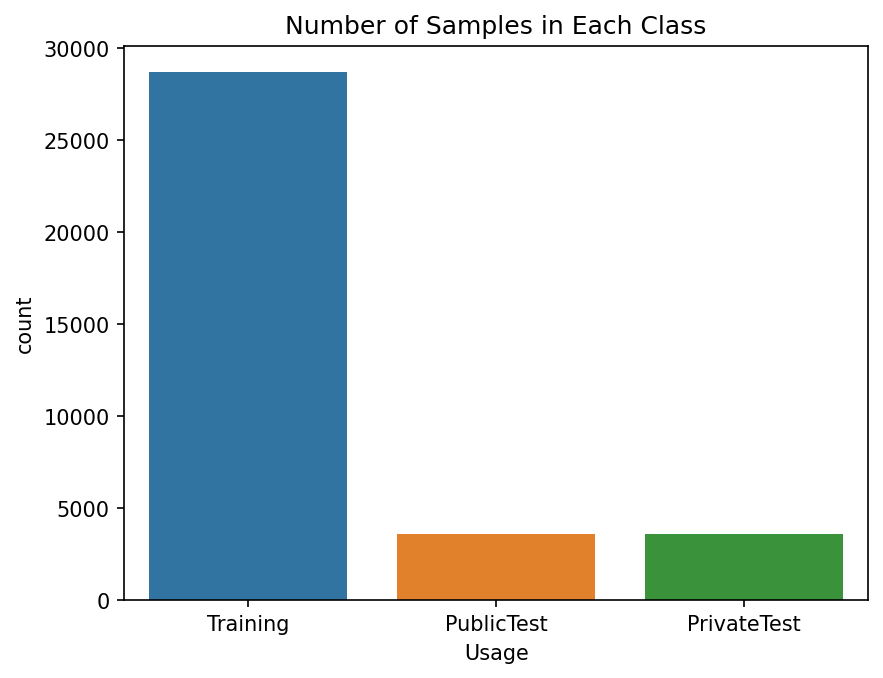

In [9]:
# Number of samples in training, validation and test set.
sns.countplot(x=df_FERPlus['Usage'])
plt.title('Number of Samples in Each Class')
plt.show()

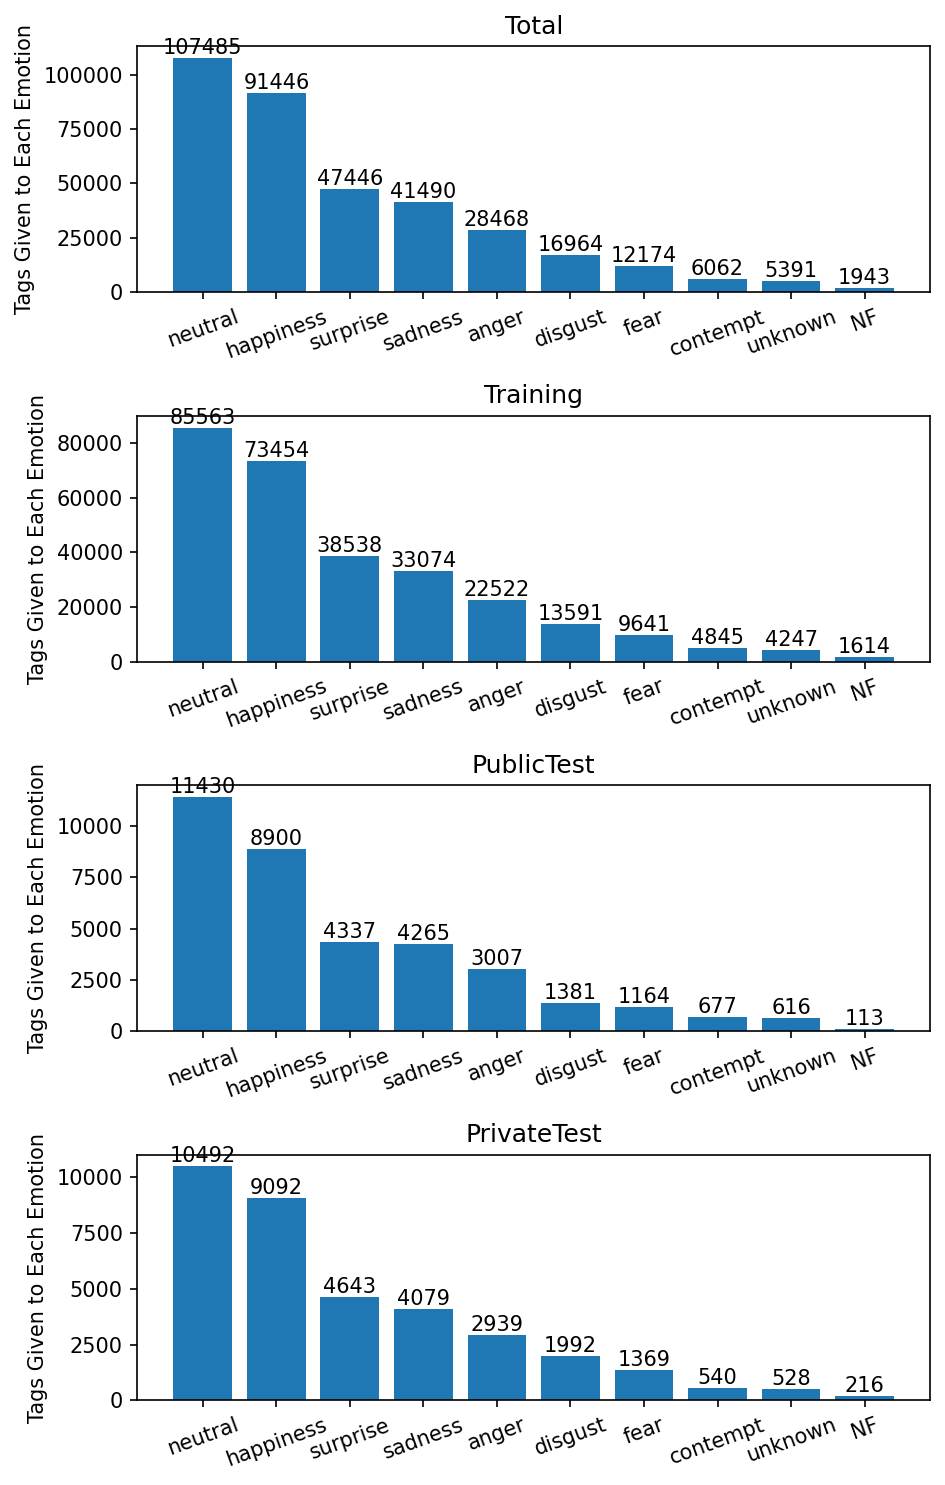

In [10]:
# Number of tags given to each emotion class for total, training, validation and test sets.
usage_labels = ['Total', 'Training', 'PublicTest', 'PrivateTest']
emotion_labels = df_FERPlus.columns[1:11]
x_pos = np.arange(len(emotion_labels))

fig, ax = plt.subplots(len(usage_labels), 1)
fig.set_figheight(10)
for i in range(len(usage_labels)):
    df_subset = df_FERPlus[df_FERPlus.Usage==usage_labels[i]] if i > 0 else df_FERPlus
    count = ax[i].bar(x_pos, df_subset.iloc[:, 1:11].sum(axis=0).sort_values(ascending=False))
    ax[i].set_xticks(x_pos, labels=emotion_labels, rotation=20)
    ax[i].set_title(usage_labels[i])
    ax[i].set_ylabel('Tags Given to Each Emotion')
    ax[i].bar_label(count)
fig.tight_layout()
plt.show()

## Step 3.2. Facial Images

In [11]:
image_height = image_width = 48

def get_image(pixels):
    '''
    Transforms a string of image pixels to an numpy 2D array of the image (with size 48x48).
    
    Parameter:
        pixels: str
            A string of 48x48 image pixels in [0, 255] scale, separated by an empty space.
    
    Return:
        image: numpy.ndarray
            A 48x48 numpy 2D array of the image.
    '''
    image = np.asarray(pixels.split(), dtype=np.uint8).reshape(image_height, image_width)
    return image

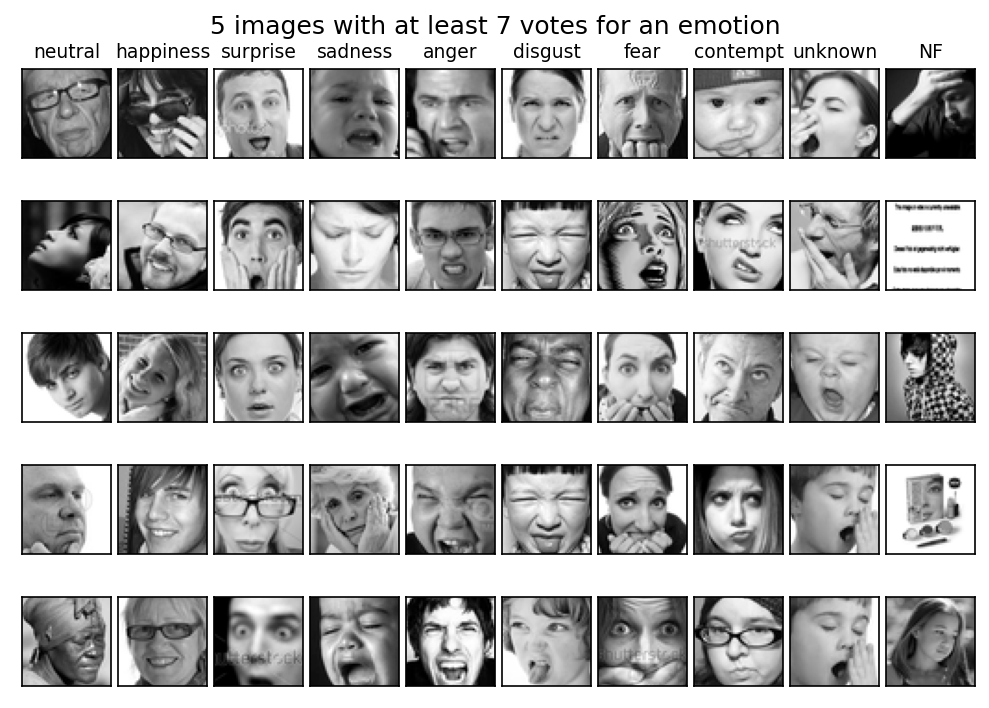

In [12]:
# Check sample images for each emotion.
# Pick the images for an emotion if the number of tags given to that emotion reaches 7.

threshold = 7  # Minimum number of tags given to an emotion.
num_images = 5  # Number of images to show for each emotion.
fig, ax = plt.subplots(num_images, len(emotion_labels))

# Show some images from each category.
for j, emotion_label in enumerate(emotion_labels):
    ax[0][j].set_title(emotion_label, fontsize=9)
    df_subset = df_FERPlus[df_FERPlus[emotion_label] >= threshold].reset_index()
    image_indices = np.random.choice(range(len(df_subset)), size=num_images, replace=False)
    for i, image_index in enumerate(image_indices):
        ax[i][j].imshow(get_image(df_subset['pixels'][image_index]), cmap='gray')
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
fig.suptitle('{} images with at least {} votes for an emotion'.format(num_images, threshold))
fig.tight_layout(pad=0)
plt.show()

## Step 4. Data Cleaning

In [13]:
# Remove samples with unknown & NF votes greater than 3.
df_cleaned = df_FERPlus[(df_FERPlus.unknown + df_FERPlus.NF) <= 3].reset_index()
print('df_cleaned shape: {}'.format(df_cleaned.shape))

df_cleaned shape: (35393, 13)


In [14]:
# Number of remaining samples in training, validation and test set.
df_cleaned.groupby('Usage')['Usage'].count()

Usage
PrivateTest     3535
PublicTest      3541
Training       28317
Name: Usage, dtype: int64

## Step 5. Save Processed Data

In [15]:
# Store and save images in numpy array.
images = np.expand_dims(np.array(df_cleaned['pixels'].map(get_image).tolist()), axis=-1)
print("images shape:", images.shape)

path_images = '../datasets/images.npy'
try:
    savebuffer_images = images
except Exception:
    print('Error.')
np.save(path_images, savebuffer_images)
print("images saved at: {}".format(path_images))

images shape: (35393, 48, 48, 1)
images saved at: ../datasets/images.npy


In [16]:
# Store and save emotions in numpy arrays.
emotions_8 = df_cleaned.iloc[:,2:10].to_numpy()
# i: maximum number of emotions to keep
for i in range(1, 9):
    # Store emotions to list.
    emotions_i = []
    # For each emotion row:
    for j, emotion_8 in enumerate(emotions_8):
        # Remove superfluous labels.
        emotion_i = emotion_8.copy()
        num_existing_emotions = len(emotion_i[emotion_i > 0])
        num_emotions_to_remove = max(0, num_existing_emotions-i)
        for k in range(num_emotions_to_remove):
            # Randomly pick a label to remove if there is a tie.
            remove_index = np.random.choice([
                index for index, value in enumerate(emotion_i) \
                if value == min(emotion_i[emotion_i > 0])
            ])
            # Remove label by setting the number of votes to 0.
            emotion_i[remove_index] = 0
        # Check the remaining labels do not exceed i.
        num_remaining_emotions = len(emotion_i[emotion_i > 0])
        assert(num_remaining_emotions == min(i, num_existing_emotions))
        # Normalize and save this row.
        emotion_i = emotion_i / np.sum(emotion_i)
        emotions_i.append(emotion_i)
    # All rows converted. Validate shape.
    emotions_i = np.array(emotions_i)
    print('emotions_{} shape: {}'.format(i, emotions_i.shape))
    # Save emotions numpy array.
    path_emotions = '../datasets/emotions_{}.npy'.format(i)
    try:
        savebuffer_emotions_i = emotions_i
    except Exception:
        print('Error.')
    np.save(path_emotions, savebuffer_emotions_i)
    print("emotions_{} saved at: {}".format(i, path_emotions))

emotions_1 shape: (35393, 8)
emotions_1 saved at: ../datasets/emotions_1.npy
emotions_2 shape: (35393, 8)
emotions_2 saved at: ../datasets/emotions_2.npy
emotions_3 shape: (35393, 8)
emotions_3 saved at: ../datasets/emotions_3.npy
emotions_4 shape: (35393, 8)
emotions_4 saved at: ../datasets/emotions_4.npy
emotions_5 shape: (35393, 8)
emotions_5 saved at: ../datasets/emotions_5.npy
emotions_6 shape: (35393, 8)
emotions_6 saved at: ../datasets/emotions_6.npy
emotions_7 shape: (35393, 8)
emotions_7 saved at: ../datasets/emotions_7.npy
emotions_8 shape: (35393, 8)
emotions_8 saved at: ../datasets/emotions_8.npy
